<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-и-исследовательский-анализ-данных" data-toc-modified-id="Предобработка-и-исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка и исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Объединение-датасета-и-его-анализ" data-toc-modified-id="Объединение-датасета-и-его-анализ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Объединение датасета и его анализ</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Catboost</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>LGBM</a></span></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ моделей</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

**Цель: Оптимизировать энергопотребление на этапе обработки стали, прогнозирую финальную температуру партии в конце этапа.** 

План работы:
- Создание новых фичей для анализа данных и предсказаний, соединение нескольких источников в один;
- Исследовательскийй анализ данных - он помогает лучше понять данные и взаимосвязи;
- Проверка на мультиколлинеарность;
- Выделение важности признаков при обучении моделей, для собственного понимания процесса и объяснения Заказчикам;

## Предобработка и исследовательский анализ данных

In [ ]:
# Загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle
import lightgbm
from lightgbm import LGBMRegressor
!pip install catboost
import catboost
from catboost import CatBoostRegressor
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
notebook = time.time()

In [ ]:
# Загрузим датасеты и ознакомимся с каждым из них
df_arc = pd.read_csv('/content/data_arc.csv')
df_bulk = pd.read_csv('/content/data_bulk.csv')
df_bulk_t = pd.read_csv('/content/data_bulk_time.csv')
df_gas = pd.read_csv('/content/data_gas.csv')
df_temp = pd.read_csv('/content/data_temp.csv')
df_wire = pd.read_csv('/content/data_wire.csv')
df_wire_time = pd.read_csv('/content/data_wire_time.csv')

In [ ]:
# Проверка датасета с электродами
display(df_arc.head(10))
display(df_arc.info())
display(df_arc.describe())

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


**Вывод:**
- В таблице указано время начала нагрева и окончание, а также затраченная мощность;
- Пропусков нет;
- Всего 14876 наблюдений, но партий обработки 3241;
- есть аномальное значение в реактивной мощности, необходимо найти значение и взять среднее или примерное значение в партии.

In [ ]:
# Рекативная мощность примерно равноа 0.35
df_arc.loc[9777:9782]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9777,2115,2019-07-24 00:21:20,2019-07-24 00:22:21,0.259949,0.175169
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796
9782,2117,2019-07-24 01:06:01,2019-07-24 01:07:57,0.443970,0.367739


In [ ]:
# Заменим значение
df_arc.loc[9780, ['Реактивная мощность']] = 0.35

In [ ]:
# Создадим функцию для определения 0,'None', Nan
def null(df, k):
    element = [0, 'None']
    k = k
    df = df
    for i in element:
        display(df[df[k] == i])
        display(df[df[k].isna()])

In [ ]:
# Детекция отклонений
features = df_arc.columns.to_list()
for k in features:
    print(k)
    null(df_arc, k)

key


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


Начало нагрева дугой


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


Конец нагрева дугой


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


Активная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


In [ ]:
# Проведем агрегацию данных для получение суммарной мощности по 1 партии
df_arc = df_arc.groupby('key')['Активная мощность', 'Реактивная мощность'].sum()
df_arc = pd.DataFrame(df_arc)
df_arc.head()

,Активная мощность,Реактивная мощность
key,,
1,4.878147,3.183241
2,3.052598,1.998112
3,2.525882,1.599076
4,3.209250,2.060298
5,3.347173,2.252643


In [ ]:
# Проверка датасета с сыпучими материалами
display(df_bulk.head(10))
display(df_bulk.info())
display(df_bulk.describe())

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


**Вывод:**
- Кол-во наблюдений 3129, т.е. не во все партии поступает сыпучий материал;
- Самый нагруженные - это бункера 12,14,15;
- NaN - значит подачи материала не было - заменим на 0;

In [ ]:
# Детекция отклонений
features = df_bulk.columns.to_list()
for k in features:
    print(k)
    null(df_bulk, k)

key


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


Bulk 1


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 2


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 3


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,3234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.0,204.0
3122,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,118.0,206.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,3234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.0,204.0
3122,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,118.0,206.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 4


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0
12,13,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,410.0,NaN,151.0,204.0
13,14,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,203.0
14,15,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.0,203.0
15,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,100.0,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0
12,13,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,410.0,NaN,151.0,204.0
13,14,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,203.0
14,15,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.0,203.0
15,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,100.0,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 5


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 6


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,118.0,206.0
3123,3236,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,NaN,132.0,208.0
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,118.0,206.0
3123,3236,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,NaN,132.0,208.0
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0


Bulk 7


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 8


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 9


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 10


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 11


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 12


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
14,15,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.0,203.0
16,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,202.0
18,19,NaN,NaN,NaN,NaN,NaN,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN
21,22,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,3214,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3103,3215,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3121,3234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.0,204.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
14,15,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.0,203.0
16,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,202.0
18,19,NaN,NaN,NaN,NaN,NaN,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN
21,22,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,3214,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3103,3215,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3121,3234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.0,204.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 13


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


Bulk 14


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
18,19,NaN,NaN,NaN,NaN,NaN,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,26,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,48,NaN,NaN,NaN,NaN,NaN,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,49,NaN,NaN,NaN,NaN,NaN,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,50,NaN,NaN,NaN,NaN,NaN,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,3205,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3097,3209,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3100,3212,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,3214,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
18,19,NaN,NaN,NaN,NaN,NaN,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,26,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,48,NaN,NaN,NaN,NaN,NaN,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,49,NaN,NaN,NaN,NaN,NaN,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,50,NaN,NaN,NaN,NaN,NaN,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,3205,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3097,3209,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3100,3212,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,3214,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
18,19,NaN,NaN,NaN,NaN,NaN,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN
21,22,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,NaN
25,26,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,150.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,3212,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,3214,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3103,3215,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3109,3222,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,20.0,158.0,NaN,348.0,NaN


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
18,19,NaN,NaN,NaN,NaN,NaN,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN
21,22,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,NaN
25,26,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,150.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,3212,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,3214,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3103,3215,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3109,3222,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,20.0,158.0,NaN,348.0,NaN


In [ ]:
# Заменим Nan на 0 для дальнейшего обучения
df_bulk = df_bulk.fillna(0)
# Проверка
display(df_bulk.head())

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


In [ ]:
# Время загрузки материала и проволоки не будем использовать
display(df_bulk_t.head())
display(df_wire_time.head())
# Загрузка распределена по времени, влияние времени загрузки на целевой признак минимально

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Проверка датасета с газом
display(df_gas.head())
display(df_gas.info())
df_gas.describe()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


**Вывод:**
- Наблюдений 3239, продувка есть не во всех партиях;
- Наблюдения по газу уже сагрегированы суммарно по партии; 

In [ ]:
# Детекция отклонений
features = df_gas.columns.to_list()
for k in features:
    print(k)
    null(df_gas, k)

key


,key,Газ 1


,key,Газ 1


,key,Газ 1


,key,Газ 1


Газ 1


,key,Газ 1


,key,Газ 1


,key,Газ 1


,key,Газ 1


In [ ]:
# Проверка датасета с температурой
display(df_temp.head(12))
df_temp.describe()

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


**Вывод:**
- Количество замеров 15907, внутри партии несколько замеров, нам нужен первый и последний;
- Среднее не отличается от медианы, ст.отклонение небольшое.

In [ ]:
# Детекция пропусков
features = df_temp.columns.to_list()
for k in features:
    print(k)
    null(df_temp, k)

key


,key,Время замера,Температура


,key,Время замера,Температура


,key,Время замера,Температура


,key,Время замера,Температура


Время замера


,key,Время замера,Температура


,key,Время замера,Температура


,key,Время замера,Температура


,key,Время замера,Температура


Температура


,key,Время замера,Температура


,key,Время замера,Температура
12268,2500,2019-08-06 03:24:43,NaN
12269,2500,2019-08-06 03:25:16,NaN
12270,2500,2019-08-06 03:28:21,NaN
12272,2501,2019-08-06 04:01:59,NaN
12273,2501,2019-08-06 04:14:35,NaN
...,...,...,...
15901,3240,2019-09-01 03:35:16,NaN
15903,3241,2019-09-01 04:16:12,NaN
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN


,key,Время замера,Температура


,key,Время замера,Температура
12268,2500,2019-08-06 03:24:43,NaN
12269,2500,2019-08-06 03:25:16,NaN
12270,2500,2019-08-06 03:28:21,NaN
12272,2501,2019-08-06 04:01:59,NaN
12273,2501,2019-08-06 04:14:35,NaN
...,...,...,...
15901,3240,2019-09-01 03:35:16,NaN
15903,3241,2019-09-01 04:16:12,NaN
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN


In [ ]:
# Оценим пропуски
df_temp.loc[12268:12300]
# У всех пропусков одна взаимосвязь, есть первый замер, но нет остальных, скорее всего что-то случилось с оборудованием

,key,Время замера,Температура
12268,2500,2019-08-06 03:24:43,NaN
12269,2500,2019-08-06 03:25:16,NaN
12270,2500,2019-08-06 03:28:21,NaN
12271,2501,2019-08-06 03:44:42,1587.0
12272,2501,2019-08-06 04:01:59,NaN
12273,2501,2019-08-06 04:14:35,NaN
12274,2501,2019-08-06 04:22:14,NaN
12275,2501,2019-08-06 04:31:14,NaN
12276,2502,2019-08-06 04:45:26,1583.0
12277,2502,2019-08-06 04:46:04,NaN


In [ ]:
# Удалим пропуски
df_temp = df_temp.dropna()
df_temp.loc[12268:12300]

,key,Время замера,Температура
12271,2501,2019-08-06 03:44:42,1587.0
12276,2502,2019-08-06 04:45:26,1583.0
12283,2503,2019-08-06 05:32:06,1603.0
12287,2504,2019-08-06 06:35:39,1583.0
12290,2505,2019-08-06 07:18:17,1606.0
12295,2506,2019-08-06 08:07:17,1595.0


In [ ]:
# Проверка датасета с проволокой
display(df_wire.head())
df_wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060484,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


**Вывод:**
- Количество замеров 3081, не во всех партиях добавляется проволока;
- Основной объем по 1 трайбу;
- Nan заменим на 0, имея ввиду 0 объем.

In [ ]:
df_wire = df_wire.fillna(0)
df_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Объединение датасета и его анализ

In [ ]:
# Выделим первый замер температуры и целевой
df_temp_first = df_temp.groupby('key')['Температура'].first()
df_temp_last = df_temp.groupby('key')['Температура'].last()
df_temp_first = pd.DataFrame(df_temp_first)
df_temp_last = pd.DataFrame(df_temp_last)
display(df_temp_first.head())
display(df_temp_last.head())

,Температура
key,
1,1571.0
2,1581.0
3,1596.0
4,1601.0
5,1576.0


,Температура
key,
1,1613.0
2,1602.0
3,1599.0
4,1625.0
5,1602.0


In [ ]:
# Объединим датасеты, выделим признаки _2 - целевой.
# Данный датасет будет основной, к нему будут присоеденены остальные
df_final = df_temp_first.merge(df_temp_last, on='key', how='left', suffixes=('_1', '_2'))

In [ ]:
# Удалим строки, где температуры равны, т.к. мы удаляли Nan и там был только первый замер.
df_final.drop(df_final[df_final['Температура_1'] == df_final['Температура_2']].index, inplace=True)
# Проверка
df_final[df_final['Температура_1'] == df_final['Температура_2']]

,Температура_1,Температура_2
key,,


In [ ]:
# Добавим остальные датасеты
df_final = df_final.merge(df_arc, on='key', how='left')
df_final = df_final.merge(df_gas, on='key', how='left')
df_final = df_final.merge(df_bulk, on='key', how='left')
df_final = df_final.merge(df_wire, on='key', how='left')
# Датасет готов к исследованию, масштабированию и обучению
display(df_final.head())
display(df_final.describe())

,key,Температура_1,Температура_2,Активная мощность,Реактивная мощность,Газ 1,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,1571.0,1613.0,4.878147,3.183241,29.749986,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1581.0,1602.0,3.052598,1.998112,12.555561,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1596.0,1599.0,2.525882,1.599076,28.554793,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1601.0,1625.0,3.209250,2.060298,18.841219,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1576.0,1602.0,3.347173,2.252643,5.413692,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,Температура_1,Температура_2,Активная мощность,Реактивная мощность,Газ 1,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2431.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.0,2336.000000,2336.000000,2336.000000,2336.000000
mean,1249.351418,1588.297164,1595.351007,3.135468,2.335211,11.167258,3.333192,1.400846,46.443552,36.157717,2.600000,22.102326,1.994080,0.020719,0.438055,4.928964,4.021564,209.298097,1.051163,153.945032,117.133192,102.254943,17.959348,3.225099,0.305631,0.0,0.975887,0.006341,0.310378,0.420704
std,720.624129,29.405333,16.017495,1.428826,1.080565,6.335885,12.249339,18.937067,74.901107,58.196921,22.233414,55.543908,30.456801,1.007582,6.173334,20.652533,21.928374,156.386729,14.126855,82.070501,85.649739,43.742520,34.117002,27.901529,4.750638,0.0,8.680424,0.205397,4.396136,4.364634
min,1.000000,1191.000000,1541.000000,0.186226,0.158247,0.008399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,626.000000,1571.000000,1587.000000,2.155224,1.618716,7.125996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,105.000000,0.000000,72.859018,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1250.000000,1587.000000,1593.000000,3.022744,2.231670,9.942109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,149.000000,106.000000,101.041199,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1871.000000,1605.000000,1599.000000,3.920676,2.914965,13.879786,0.000000,0.000000,77.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.000000,0.000000,204.000000,204.000000,128.138394,23.170420,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,2499.000000,1679.000000,1700.000000,17.496497,12.587990,77.995040,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.000000,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000,330.314424,282.780152,385.008668,113.231044,0.0,180.454575,8.490040,102.762401,90.053604


In [ ]:
df_final = df_final.fillna(0)

In [ ]:
# Проведем исследования как коррелируют с Температурой 2 остальные переменные и между собой.
df_final.corr(method='pearson')

,key,Температура_1,Температура_2,Активная мощность,Реактивная мощность,Газ 1,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,1.000000,-0.019455,-0.084517,-0.038306,-0.001498,-0.036513,-0.071221,-0.005766,-0.006820,-0.026571,0.034557,0.008459,0.051609,0.015104,-0.038296,0.059703,0.036623,0.028324,-0.015075,-0.103675,-0.042711,-0.010494,0.048960,-0.026068,0.048004,NaN,-0.007611,0.036010,-0.034688,0.032593
Температура_1,-0.019455,1.000000,0.371569,-0.328970,-0.313879,-0.000929,0.053966,0.108840,-0.126684,0.097100,0.058166,-0.114670,0.066056,-0.009861,-0.028431,0.020141,-0.092650,-0.070967,0.013573,-0.156526,-0.115811,0.072085,-0.101767,-0.006249,0.057786,NaN,0.012798,0.040517,-0.025608,0.006674
Температура_2,-0.084517,0.371569,1.000000,0.238505,0.192237,-0.034518,-0.083576,-0.065451,-0.087815,0.047213,-0.033690,-0.172191,-0.082459,-0.020704,-0.019673,0.012628,-0.097174,0.160944,-0.016568,0.005714,0.009256,-0.070390,-0.205656,-0.046557,-0.117083,NaN,-0.071137,-0.097661,-0.015944,-0.037152
Активная мощность,-0.038306,-0.328970,0.238505,1.000000,0.959645,0.374672,0.088299,0.031200,0.118740,-0.019306,0.007713,0.157839,0.073098,-0.010890,0.023988,0.000203,0.078795,0.480796,0.120376,0.461421,0.332347,0.039965,0.043582,0.036109,0.047237,NaN,0.053346,0.019534,0.029598,-0.032453
Реактивная мощность,-0.001498,-0.313879,0.192237,0.959645,1.000000,0.359419,0.112935,0.052010,0.078965,-0.020563,0.020277,0.149707,0.099419,-0.007881,0.011911,-0.006403,0.084816,0.460769,0.115409,0.429122,0.301426,0.016576,0.044100,0.031778,0.075055,NaN,0.055692,0.036588,0.017269,-0.022159
Газ 1,-0.036513,-0.000929,-0.034518,0.374672,0.359419,1.000000,0.244162,0.216893,0.078281,0.037229,0.089633,0.149452,0.197767,0.004767,0.117357,-0.000754,0.047881,0.226726,0.050891,0.280639,0.080129,0.159814,0.111981,0.105814,0.145557,NaN,0.110348,0.078900,0.118800,0.007677
Bulk 1,-0.071221,0.053966,-0.083576,0.088299,0.112935,0.244162,1.000000,0.226819,-0.001468,0.050655,0.062473,0.000046,0.238969,-0.005436,-0.018756,-0.019106,-0.033932,0.324763,-0.009185,0.208042,0.019117,0.038253,-0.007728,0.022116,0.147926,NaN,0.150900,0.084287,-0.018547,0.003599
Bulk 2,-0.005766,0.108840,-0.065451,0.031200,0.052010,0.216893,0.226819,1.000000,-0.044364,0.043295,0.360528,-0.028560,0.679060,-0.001479,-0.005104,-0.017154,0.002640,-0.093944,-0.005352,-0.128742,-0.095896,-0.146029,-0.037426,0.223481,0.699403,NaN,0.559030,0.431775,-0.005047,-0.006889
Bulk 3,-0.006820,-0.126684,-0.087815,0.118740,0.078965,0.078281,-0.001468,-0.044364,1.000000,-0.267659,-0.003326,0.075676,-0.031704,0.021269,0.013327,-0.076501,-0.002453,0.037538,-0.011109,0.040504,0.027871,0.083540,0.099841,0.009095,-0.038346,NaN,0.010326,-0.018403,0.006862,-0.008543
Bulk 4,-0.026571,0.097100,0.047213,-0.019306,-0.020563,0.037229,0.050655,0.043295,-0.267659,1.000000,0.032498,-0.231730,0.047618,-0.012357,-0.000307,-0.076003,-0.109697,0.119350,0.005935,-0.051584,0.141492,0.314999,-0.249849,-0.034761,0.036590,NaN,-0.007233,0.034777,0.010374,-0.057366


- Активная мощность и реактивная мощность имеют корреляцию больше 0,7 (мультиколлинеарность). Для исключения нагрузки на модели уберем избыточную фичу, либо правильным будет получить полную мощность - S = sqrt(P^2 + Q^2).
- Bulk 9 and Wire 8 - мультиколлинеартны (0.97) - удаляем признак Wire 8, т.к. меньше наблюдений;
- Bulk 2, Bulk 7 сильно коррелирует с Wire 4 - 0,7 и 0,74 - удалим Wire 4, т.к. связь с большим кол-вом элементов;
- Удалим Wire 5, т.к. трайб мало использовался в производстве.

In [ ]:
df_final = df_final.rename(columns={'Температура_1':'T_1', 'Температура_2':'T_2', 'Активная мощность':'P', 'Реактивная мощность':'Q', 'Газ 1':'Gas'})

In [ ]:
df_final['S'] = np.sqrt(df_final['P']**2 + df_final['Q']**2)
df_final = df_final.drop(['P', 'Q', 'Wire 8', 'Wire 4', 'Wire 5'], axis=1)

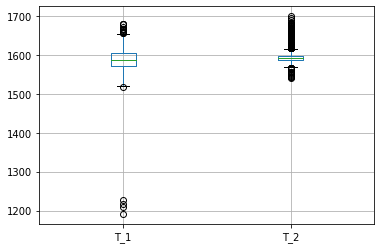

In [ ]:
df_final.loc[:,['T_1', 'T_2']].boxplot()

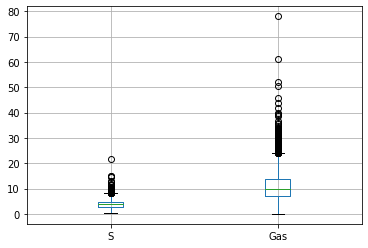

In [ ]:
df_final.loc[:,['S', 'Gas']].boxplot()

In [ ]:
# Удалим небольшое кол-во выбросов, остальные трогать не будем.
df_final.drop(df_final[df_final['T_1'] <= 1300].index, inplace=True)
df_final.drop(df_final[df_final['Gas'] >= 35].index, inplace=True)
df_final.drop(df_final[df_final['S'] >= 12].index, inplace=True)
display(df_final.shape)
down = (2433 - len(df_final)) / 2433 * 100
print('Уменьшение полной выборки на {:.2f} %'.format(down))

(2412, 26)

Уменьшение полной выборки на 0.86 %


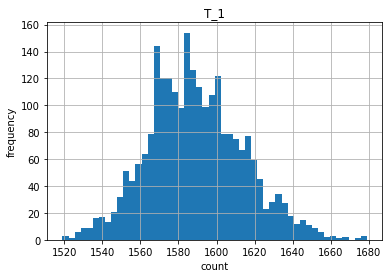

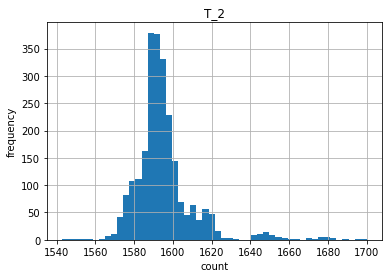

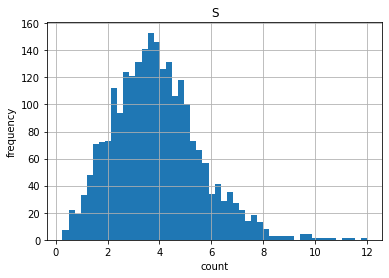

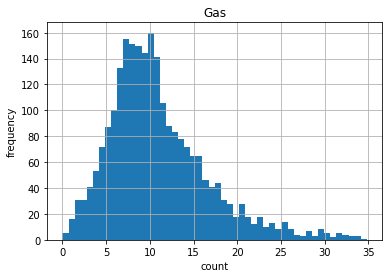

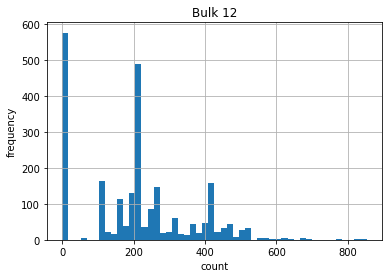

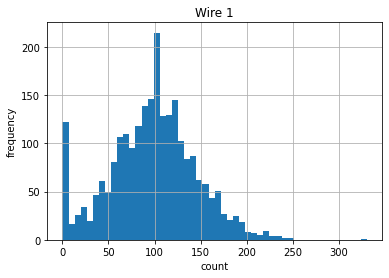

In [ ]:
# Посмотрим на нормальные распределения после всей обработки и чистки 
def show_me_hist(df, i):
    df[df.columns.values[i]].hist(bins=50)
    plt.xlabel('count')
    plt.ylabel('frequency')
    plt.title(df.columns.values[i])
    plt.show()
for i in range(6):
    show_me_hist(df_final.loc[:,['T_1','T_2', 'S', 'Gas', 'Bulk 12', 'Wire 1']], i)

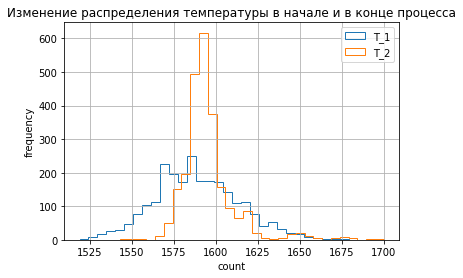

In [ ]:
T = ['T_1','T_2']
for i in df_final[T].columns:
    df_final[i].hist(bins=30, histtype='step')
    plt.xlabel('count')
    plt.ylabel('frequency')
    plt.title('Изменение распределения температуры в начале и в конце процесса')
    plt.legend(['Т_1', 'Т_2'])

## Обучение моделей

In [ ]:
# Создадим датасет для обучения
df = df_final.copy()
# Кат.фичей нет, подготовка типов данных для catboost & LGBM не нужна

In [ ]:
# Разделим выборки трейн, тест
X = df.drop(['key','T_2'], axis=1)
y = df['T_2']
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X

,T_1,Gas,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 6,Wire 7,Wire 9,S
0,1571.0,29.749986,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,5.824889
1,1581.0,12.555561,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,3.648398
2,1596.0,28.554793,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,2.989502
3,1601.0,18.841219,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,3.813674
4,1576.0,5.413692,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,4.034596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,1570.0,7.125735,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,256.0,0.0,129.0,223.0,89.150879,0.00000,0.0,0.0,0.0,0.0,3.985197
2429,1554.0,9.412616,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,122.0,0.0,256.0,0.0,129.0,226.0,114.179527,0.00000,0.0,0.0,0.0,0.0,5.055976
2430,1571.0,6.271699,0.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,0.0,124.0,226.0,94.086723,9.04800,0.0,0.0,0.0,0.0,2.884756
2431,1591.0,14.953657,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,206.0,0.0,129.0,207.0,118.110717,0.00000,0.0,0.0,0.0,0.0,4.143362


In [ ]:
# Проведем масштабирование признаков
num = X.columns.to_list()
scaler = StandardScaler()
scaler.fit(X_tr[num])
X_tr[num] = scaler.transform(X_tr[num])
X_test[num] = scaler.transform(X_test[num])
display(X_tr.head()) # проверим
if (X_tr.shape[0] + X_test.shape[0]) == len(df):
    print("Проверка пройдена")

,T_1,Gas,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 6,Wire 7,Wire 9,S
2286,1.226433,-0.414528,-0.271581,-0.057654,-0.606440,0.410926,-0.110372,-0.401312,-0.052179,0.0,-0.069569,1.260440,-0.181497,-0.291374,-0.068895,-0.047577,-0.147122,-0.361452,0.151502,-0.102727,-0.096251,-0.023518,-0.092875,-1.280895
1680,0.638585,-0.155399,2.505591,-0.057654,1.150085,-0.601905,-0.110372,-0.401312,-0.052179,0.0,-0.069569,-0.229455,-0.181497,0.002251,-0.068895,-0.629443,-0.124085,0.268655,0.547080,-0.102727,-0.096251,-0.023518,-0.092875,-0.939280
983,0.325066,-1.506690,3.849384,-0.057654,-0.606440,-0.601905,-0.110372,1.221208,-0.052179,0.0,-0.069569,-0.229455,-0.181497,-1.328847,-0.068895,0.013034,-1.321995,-0.678568,-0.520339,-0.102727,-0.096251,-0.023518,-0.092875,-1.204923
708,-2.261466,0.965455,-0.271581,-0.057654,-0.606440,3.257330,-0.110372,-0.401312,-0.052179,0.0,-0.069569,-0.229455,-0.181497,1.998898,-0.068895,0.752488,1.016233,0.023988,-0.520339,-0.102727,-0.096251,-0.023518,-0.092875,2.328687
2213,0.795344,-0.775704,-0.271581,-0.057654,-0.606440,-0.601905,-0.110372,0.820350,-0.052179,0.0,-0.069569,-0.229455,-0.181497,-1.328847,-0.068895,-1.805296,-1.321995,-0.089076,-0.520339,-0.102727,-0.096251,-0.023518,-0.092875,-1.533809


Проверка пройдена


### Константная модель

In [ ]:
# Создадим константную модель для определения границы для следующих моделей
target_constant = pd.Series(y_tr.median(), index=y_tr.index)
const = mean_absolute_error(y_tr, target_constant)
print('Результат константной модели MAE: {:.2f}'.format(const))

Результат константной модели MAE: 10.11


### Linear Regression

In [ ]:
# LinearRegression
line = LinearRegression()
lr = time.time()
line_mae = cross_val_score(line, X_tr, y_tr, cv=3, scoring = 'neg_mean_absolute_error')
lr2 = time.time()
print('Результат линейной регрессии: {:.2f}'.format(np.mean(line_mae)*-1))
print('Время обучения ЛР: {:.2f} cек.'.format(lr2 - lr))

Результат линейной регрессии: 8.03
Время обучения ЛР: 0.06 cек.


Feature: 0, Score: 11.62
Feature: 1, Score: -1.77
Feature: 2, Score: -1.66
Feature: 3, Score: -0.28
Feature: 4, Score: -0.28
Feature: 5, Score: -0.19
Feature: 6, Score: -0.42
Feature: 7, Score: -2.13
Feature: 8, Score: -0.74
Feature: 9, Score: 0.00
Feature: 10, Score: 0.13
Feature: 11, Score: -0.37
Feature: 12, Score: -0.68
Feature: 13, Score: 1.49
Feature: 14, Score: -1.16
Feature: 15, Score: -1.78
Feature: 16, Score: -1.91
Feature: 17, Score: -2.87
Feature: 18, Score: -2.01
Feature: 19, Score: 0.26
Feature: 20, Score: -0.04
Feature: 21, Score: -1.41
Feature: 22, Score: -0.05
Feature: 23, Score: 10.79


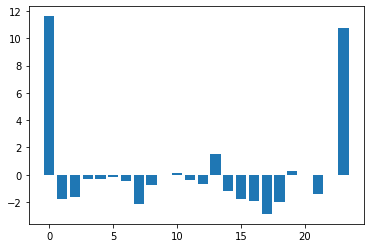

In [ ]:
# Проверим модель на важность признаков
line.fit(X_tr, y_tr)
importance = line.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- Линейная регрессия учитывает только Т_1 и S.

### RandomForestRegressor

In [ ]:
# Подберем гиперпараметры для случайного леса
#Random_forest = RandomForestRegressor()
#grid = {'n_estimators': range (100, 150, 10),
#        'max_depth': range (5, 15, 1) }
#forest_rs = RandomizedSearchCV(Random_forest, n_jobs=-1, n_iter=10,
#                                 param_distributions=grid, random_state=42, scoring='neg_mean_absolute_error')
#forest_rs.fit(X_tr, y_tr)
#print('Best Params: \n', forest_rs.best_params_ )

Best Params: 
 {'n_estimators': 100, 'max_depth': 10}

In [ ]:
# Создадим функцию для моделей - модель Случайного леса
def forest(features_tr, target_tr, depth, est):
    forest = RandomForestRegressor(max_depth=depth, n_estimators=est, random_state=42)
    f = time.time()
    forest_mae = cross_val_score(forest, X_tr, y_tr, cv=3, scoring = 'neg_mean_absolute_error')
    f2 = time.time()
    print('Результат предсказание RFR: {:.2f}'.format(np.mean(forest_mae)*-1))
    print('Время затраченное на обучение RFR:{:.2f} сек.'.format((f2-f)))

In [ ]:
# Проверка RFR на стандартных настройках
forest(X_tr, y_tr, None, 100)

Результат предсказание RFR: 6.70
Время затраченное на обучение RFR:2.90 сек.


In [ ]:
# RFR_m
forest(X_tr, y_tr, 10, 100)

Результат предсказание RFR: 6.69
Время затраченное на обучение RFR:2.18 сек.


Feature: 0, Score: 0.29
Feature: 1, Score: 0.04
Feature: 2, Score: 0.01
Feature: 3, Score: 0.00
Feature: 4, Score: 0.01
Feature: 5, Score: 0.01
Feature: 6, Score: 0.00
Feature: 7, Score: 0.03
Feature: 8, Score: 0.01
Feature: 9, Score: 0.00
Feature: 10, Score: 0.00
Feature: 11, Score: 0.00
Feature: 12, Score: 0.01
Feature: 13, Score: 0.02
Feature: 14, Score: 0.00
Feature: 15, Score: 0.03
Feature: 16, Score: 0.02
Feature: 17, Score: 0.34
Feature: 18, Score: 0.02
Feature: 19, Score: 0.00
Feature: 20, Score: 0.02
Feature: 21, Score: 0.00
Feature: 22, Score: 0.00
Feature: 23, Score: 0.13


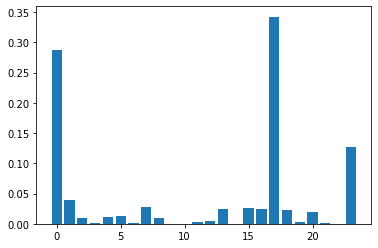

In [ ]:
# Оценка важности фичей
rfr = RandomForestRegressor(max_depth=None, n_estimators=100, random_state=42)
rfr.fit(X_tr, y_tr)
importance = rfr.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- RFR выделяет фичу Wire 1 как самый важный, помимо Т_1 и S. Много фичей, которые не играют роли в предсказании, и лишь усложняют алгоритм и нагружают вычислительные мощности.  

### Catboost

In [ ]:
# Подберем гиперпараметры для катбуст
#cat = CatBoostRegressor(random_state=42)
#grid = { 'iterations': range (200, 500, 100),
#        'depth': range (5, 10, 1),
#         'learning_rate': np.arange (0.08, 0.11, 0.01)}
#cat_rs = RandomizedSearchCV(cat, n_jobs=-1, n_iter=10,
#                                 param_distributions=grid, cv=3, random_state=42, scoring='neg_mean_absolute_error')
#cat_rs.fit(X_tr, y_tr, verbose=100)
#print('Best Params: \n', cat_rs.best_params_ )
#print(cat_rs.best_score_)

{'learning_rate': 0.08, 'iterations': 300, 'depth': 5}
-6.073313534306753

In [ ]:
# Сделаем функцию для CATBOOST
def catboost(features_tr, target_tr, it, lr, depth):
    catboost = CatBoostRegressor(iterations=it,
                             learning_rate=lr,
                             depth=depth,
                             loss_function='MAE',
                             verbose=False,
                             random_seed = 42)
    f = time.time()
    cat_mae = cross_val_score(catboost, X_tr, y_tr, cv=3, scoring = 'neg_mean_absolute_error')
    f2 = time.time()
    print('Результат catboost: {:.2f}'.format(np.mean(cat_mae)*-1))
    print('Время обучения catboost: {:.2f} cек.'.format(f2 - f))

In [ ]:
# catboost из коробки
catboost(X_tr, y_tr, None, None, None)

Результат catboost: 6.25
Время обучения catboost: 10.86 cек.


In [ ]:
# catboost_m
catboost(X_tr, y_tr, 300, 0.08, 5)

Результат catboost: 6.34
Время обучения catboost: 2.26 cек.


Feature: 0, Score: 32.12
Feature: 1, Score: 3.75
Feature: 2, Score: 2.21
Feature: 3, Score: 0.07
Feature: 4, Score: 0.98
Feature: 5, Score: 1.23
Feature: 6, Score: 0.27
Feature: 7, Score: 3.75
Feature: 8, Score: 0.19
Feature: 9, Score: 0.00
Feature: 10, Score: 0.01
Feature: 11, Score: 0.21
Feature: 12, Score: 0.69
Feature: 13, Score: 3.30
Feature: 14, Score: 0.10
Feature: 15, Score: 2.82
Feature: 16, Score: 4.20
Feature: 17, Score: 21.96
Feature: 18, Score: 3.44
Feature: 19, Score: 0.09
Feature: 20, Score: 0.37
Feature: 21, Score: 0.00
Feature: 22, Score: 0.02
Feature: 23, Score: 18.21


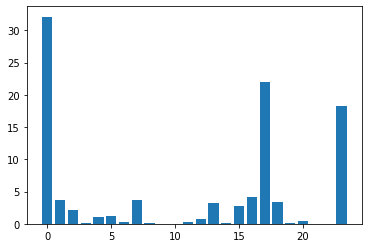

In [ ]:
# Оценка важности фичей catboost
cat = CatBoostRegressor(loss_function='MAE', verbose=False, random_state=42)
cat.fit(X_tr, y_tr)
importance = cat.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- Результат по оценке важности сравним с RFR, но catboost использует больше фичей для предсказания, поэтому и результат лучше.

### LGBM

In [ ]:
# Подберем гиперпараметры для lgbm
#lgbm = LGBMRegressor(random_state=42)
#grid = { 'n_estimators': range (120, 160, 10),
#        'max_depth': range (5, 10, 1),
#         'learning_rate': np.arange (0.08, 0.11, 0.01)}
#lgbm_rs = RandomizedSearchCV(lgbm, n_jobs=-1, n_iter=10,
#                                 param_distributions=grid, cv=3, random_state=42, scoring='neg_mean_absolute_error')
#lgbm_rs.fit(X_tr, y_tr, verbose=100)
#print('Best Params: \n', lgbm_rs.best_params_ )

Best Params: 
 {'n_estimators': 120, 'max_depth': 5, 'learning_rate': 0.08}

In [ ]:
# Сделаем функцию для LGBM
def lgbm(features_tr, target_tr, depth, lr, est):
    lgbm = LGBMRegressor(boosting_type='gbdt', max_depth=depth, learning_rate=lr, n_estimators=est, verbose=0, random_state=42)
    f = time.time()
    lgbm_mae = cross_val_score(lgbm, X_tr, y_tr, cv=3, scoring = 'neg_mean_absolute_error')
    f2 = time.time()
    print('Результат lgbm: {:.2f}'.format(np.mean(lgbm_mae)*-1))
    print('Время обучения lgbm: {:.2f} cек.'.format(f2 - f))

In [ ]:
# lGBM из коробки
lgbm(X_tr, y_tr, -1, 0.1, 100)

Результат lgbm: 6.85
Время обучения lgbm: 0.51 cек.


In [ ]:
# lGBM_m
lgbm(X_tr, y_tr, 5, 0.08, 120)

Результат lgbm: 6.68
Время обучения lgbm: 0.48 cек.


Feature: 0, Score: 464.00
Feature: 1, Score: 367.00
Feature: 2, Score: 48.00
Feature: 3, Score: 0.00
Feature: 4, Score: 119.00
Feature: 5, Score: 101.00
Feature: 6, Score: 60.00
Feature: 7, Score: 133.00
Feature: 8, Score: 0.00
Feature: 9, Score: 0.00
Feature: 10, Score: 0.00
Feature: 11, Score: 15.00
Feature: 12, Score: 34.00
Feature: 13, Score: 182.00
Feature: 14, Score: 0.00
Feature: 15, Score: 319.00
Feature: 16, Score: 157.00
Feature: 17, Score: 392.00
Feature: 18, Score: 129.00
Feature: 19, Score: 0.00
Feature: 20, Score: 32.00
Feature: 21, Score: 0.00
Feature: 22, Score: 0.00
Feature: 23, Score: 448.00


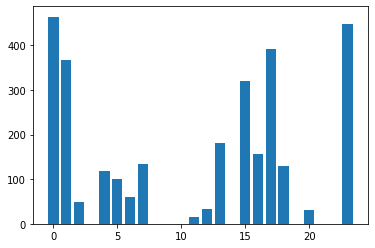

In [ ]:
# Оценка важности фичей LGBM
model_lgbm = LGBMRegressor(verbose=0, random_state=42)
model_lgbm.fit(X_tr, y_tr)
importance = model_lgbm.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- LGBM использует значительно больше фичей, но в лидерах все теже фичи.

**Вывод по признакам**
- Необходимо по графикам определить малозначимые факторы и удалить их из модели.
- Оставляем самые значимые факторы и попробуем обучить модели снова;
- Значимые признаки: T_1, Gas, B1,B3,B4,B6,B12,B14,B15,W1,W2,S

In [ ]:
# Удалим малозначимые фичи и проведем новое обучение.
X_tr_1 = X_tr.drop(['Bulk 2', 'Bulk 5', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 13', 'Wire 3', 'Wire 6', 'Wire 7', 'Wire 9'], axis=1)
X_test_1 = X_test.drop(['Bulk 2', 'Bulk 5', 'Bulk 7', 'Bulk 8', 'Bulk 9','Bulk 10', 'Bulk 11', 'Bulk 13', 'Wire 3', 'Wire 6', 'Wire 7', 'Wire 9'], axis=1)

In [ ]:
# RFR_m
forest(X_tr_1, y_tr, 10, 100)

Результат предсказание RFR: 6.69
Время затраченное на обучение RFR:2.17 сек.


In [ ]:
# catboost из коробки
catboost(X_tr_1, y_tr, None, None, None)

Результат catboost: 6.25
Время обучения catboost: 10.91 cек.


In [ ]:
# lGBM_m
lgbm(X_tr_1, y_tr, 5, 0.08, 120)

Результат lgbm: 6.68
Время обучения lgbm: 0.52 cек.


**Вывод**
- Результат от удаления фичей не ухудшился;
- Время затраченное на обучение сократилось;

## Тестирование моделей

In [ ]:
# Создадим функции для тестирования для Catboost and LGBM
def catboost_test(f_tr, t_tr, f_test, t_test, it, lr, depth):
    catboost = CatBoostRegressor(iterations=it,
                             learning_rate=lr,
                             depth=depth,
                             loss_function='MAE',
                             eval_metric='MAE',
                             verbose=False,
                             random_seed = 42)
    catboost.fit(f_tr, t_tr, eval_set=(f_test, t_test), use_best_model=True, verbose=0)
    y_pred = catboost.predict(f_test)
    print('Результат catboost: {:.2f}'.format(mean_absolute_error(t_test, y_pred)))

In [ ]:
# Сделаем функцию для LGBM
def lgbm_test(f_tr, t_tr, f_test, t_test, depth, lr, est):
    lgbm = LGBMRegressor(boosting_type='gbdt', max_depth=depth, learning_rate=lr, n_estimators=est, verbose=0, random_state=42)
    lgbm.fit(f_tr, t_tr, eval_set=[(f_test, t_test)], eval_metric='mae', verbose=0)
    y_pred = lgbm.predict(f_test)
    print('Результат LGBM: {:.2f}'.format(mean_absolute_error(t_test, y_pred)))

**Тестируем на изначальных данных**

In [ ]:
# forest_m
forest = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42)
forest.fit(X_tr, y_tr)
y_pred = forest.predict(X_test)
print('Результат RFR_m: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))

Результат RFR_m: 5.94


In [ ]:
# Catboost коробка
catboost_test(X_tr, y_tr, X_test, y_test, None, None, None)

Результат catboost: 5.79


In [ ]:
# Catboost_m
catboost_test(X_tr, y_tr, X_test, y_test, 300, 0.08, 5)

Результат catboost: 5.89


In [ ]:
# LGBM коробка
lgbm_test(X_tr, y_tr, X_test, y_test, None, None, 100)

Результат LGBM: 6.08


In [ ]:
# LGBM_m
lgbm_test(X_tr, y_tr, X_test, y_test, 5, 0.08, 120)

Результат LGBM: 6.04


**Тестируем на данных без малозначимых фичей**

In [ ]:
# forest_m
forest = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42)
forest.fit(X_tr_1, y_tr)
y_pred = forest.predict(X_test_1)
print('Результат RFR_m: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))

Результат RFR_m: 6.02


In [ ]:
# Catboost коробка
catboost_test(X_tr_1, y_tr, X_test_1, y_test, None, None, None)

Результат catboost: 5.77


In [ ]:
# Catboost_m
catboost_test(X_tr_1, y_tr, X_test_1, y_test, 300, 0.08, 5)

Результат catboost: 5.97


In [ ]:
# LGBM коробка
lgbm_test(X_tr_1, y_tr, X_test_1, y_test, None, None, 100)

Результат LGBM: 6.19


In [ ]:
# LGBM_m
lgbm_test(X_tr_1, y_tr, X_test_1, y_test, 5, 0.08, 120)

Результат LGBM: 6.07


**Результаты на тесте упали после чистки фичей** 

In [ ]:
notebook2 = time.time()
print('Время выполнения всего ноутбука: {:.2f} сек.'.format(notebook2-notebook))

Время выполнения всего ноутбука: 57.72 сек.


### Анализ моделей

In [ ]:
# Создадим таблицу для сравнения показателей моделей
table = {'Параметры': ['cross_val_score, MAE', 'best_score_test, MAE', 'time_fit, сек'], 'Const_model': [10.11, np.nan, np.nan], 'LinReg': [8.03, np.nan, 0.18], 'RFR': [6.7, np.nan, 2.82], 'RFR_m': [6.69, 5.94, 4.03], 'catboost': [6.2, 5.75, 58], 'catboost_m': [6.28, 5.99, 16.3], 'lgbm': [6.85, 6.08, 14.39], 'lgbm_m': [6.68, 6.04, 10.5]}
pivot = pd.DataFrame(data=table)
pivot

,Параметры,Const_model,LinReg,RFR,RFR_m,catboost,catboost_m,lgbm,lgbm_m
0,"cross_val_score, MAE",10.11,8.03,6.70,6.69,6.20,6.28,6.85,6.68
1,"best_score_test, MAE",NaN,NaN,NaN,5.94,5.75,5.99,6.08,6.04
2,"time_fit, сек",NaN,0.18,2.82,4.03,58.00,16.30,14.39,10.50


- Лучшее качество удалось достичь на модели catboost из коробки, но время обучение самое большое, хотя его можно сократить с помощью early_stopping;
- Модель случайного леса с изменением одного параметра (глубины дерева) тоже дала высокие резльтаты на тесте;
- Модель линейной регресии использовала всего два параметра, поэтому качество ниже;
- В итоге удалось значительно превзойти константную модель.